<h1>8. Deep Learning für Zeitreihen</h1>
<h4>Session 8 (Mittwoch 15:15 – 16:45)</h4>
<br>
8.1 Recurrent Neural Networks (RNN)<br>
8.2 LSTMs, Bsp: Stromverbrauch vorhersagen mit mehreren Inputmerkmalen<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
airline = pd.read_csv('AirPassengers.csv',index_col='Month', parse_dates=True)
airline.index.freq='MS'
airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


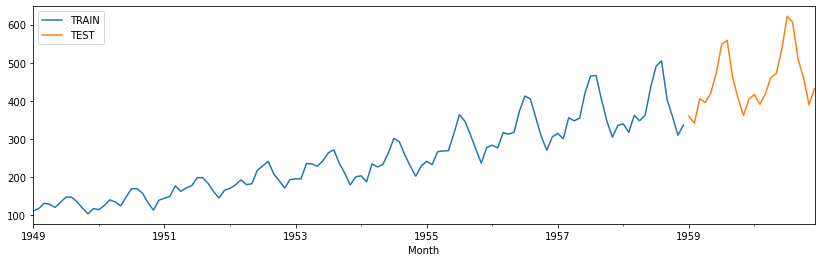

In [3]:
train_airline = airline[:120]
test_airline = airline[120:]
train_airline['#Passengers'].plot(legend=True,label='TRAIN')
test_airline['#Passengers'].plot(legend=True,label='TEST',figsize=(14,4));

In [4]:
scaler = MinMaxScaler()

In [5]:
scaler.fit(train_airline)
scaled_train = scaler.transform(train_airline)
scaled_test = scaler.transform(test_airline)

In [6]:
scaled_train[:10]

array([[0.01995012],
       [0.03491272],
       [0.06982544],
       [0.06234414],
       [0.04239401],
       [0.07730673],
       [0.10972569],
       [0.10972569],
       [0.0798005 ],
       [0.03740648]])

In [7]:
n_input = 3
n_output = 1
train_data_as_rolling_windows = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [10]:
train_data_as_rolling_windows[0]

(array([[[0.01995012],
         [0.03491272],
         [0.06982544]]]),
 array([[0.06234414]]))

In [11]:
X,y = train_data_as_rolling_windows[0]
print(f'Zu diesem Input: \n{X.flatten()}')
print(f'Gib mir folgenden Output: \n {y}')

Zu diesem Input: 
[0.01995012 0.03491272 0.06982544]
Gib mir folgenden Output: 
 [[0.06234414]]


In [51]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [52]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.fit(generator,epochs=20)

Epoch 1/20
108/108 [==============================] - 2s 5ms/step - loss: 0.0393
Epoch 2/20
108/108 [==============================] - 1s 5ms/step - loss: 0.0131
Epoch 3/20
108/108 [==============================] - 1s 6ms/step - loss: 0.0138
Epoch 4/20
108/108 [==============================] - 1s 5ms/step - loss: 0.0120
Epoch 5/20
108/108 [==============================] - 1s 5ms/step - loss: 0.0110
Epoch 6/20
108/108 [==============================] - 1s 5ms/step - loss: 0.0128
Epoch 7/20
108/108 [==============================] - 1s 5ms/step - loss: 0.0105
Epoch 8/20
108/108 [==============================] - 1s 5ms/step - loss: 0.0095
Epoch 9/20
108/108 [==============================] - 1s 5ms/step - loss: 0.0071
Epoch 10/20
108/108 [==============================] - 1s 5ms/step - loss: 0.0105
Epoch 11/20
108/108 [==============================] - 1s 5ms/step - loss: 0.0090
Epoch 12/20
108/108 [==============================] - 1s 5ms/step - loss: 0.0072
Epoch 13/20
108/108 [====

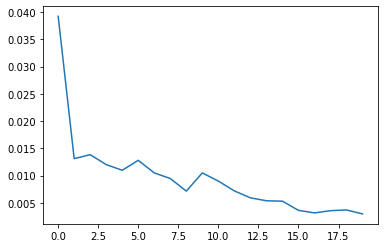

In [55]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [56]:
last_train_batch = scaled_train[-12:]

In [57]:
last_train_batch = last_train_batch.reshape((1, n_input, 1))

In [58]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 204ms/step


array([[0.6560452]], dtype=float32)

In [59]:
scaled_test[0]

array([0.63840399])

In [60]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, 1))

for i in range(len(test_airline)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 31ms/step


In [61]:
test_predictions

[array([0.6560452], dtype=float32),
 array([0.6882682], dtype=float32),
 array([0.73918027], dtype=float32),
 array([0.7779431], dtype=float32),
 array([0.8920769], dtype=float32),
 array([1.0734785], dtype=float32),
 array([1.2147269], dtype=float32),
 array([1.1445231], dtype=float32),
 array([0.94855267], dtype=float32),
 array([0.79424036], dtype=float32),
 array([0.7307932], dtype=float32),
 array([0.74442166], dtype=float32),
 array([0.7739875], dtype=float32),
 array([0.81403226], dtype=float32),
 array([0.8746262], dtype=float32),
 array([0.97352284], dtype=float32),
 array([1.1533296], dtype=float32),
 array([1.3739376], dtype=float32),
 array([1.4869206], dtype=float32),
 array([1.3760211], dtype=float32),
 array([1.1581192], dtype=float32),
 array([0.98660654], dtype=float32),
 array([0.9065877], dtype=float32),
 array([0.88410926], dtype=float32)]

In [62]:
test_airline.head()

,#Passengers,Predictions
Month,,
1959-01-01,360,359.013978
1959-02-01,342,375.673202
1959-03-01,406,398.183408
1959-04-01,396,417.438976
1959-05-01,420,482.246716


In [63]:
true_predictions = scaler.inverse_transform(test_predictions)

In [64]:
test_airline['Predictions'] = true_predictions

C:\Users\sinaa\AppData\Local\Temp\ipykernel_26792\1118789022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_airline['Predictions'] = true_predictions


In [65]:
test_airline.head()

,#Passengers,Predictions
Month,,
1959-01-01,360,367.074125
1959-02-01,342,379.995542
1959-03-01,406,400.411287
1959-04-01,396,415.955173
1959-05-01,420,461.722841


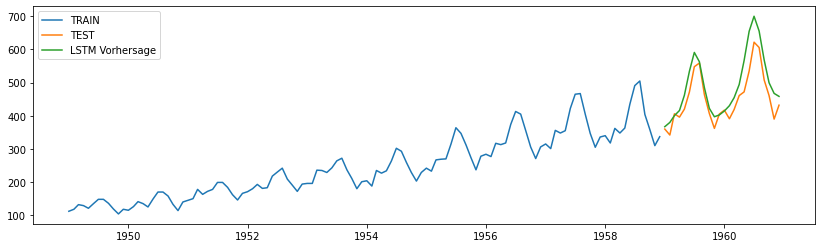

In [66]:
fig = plt.figure(figsize = (14,4))
ax = fig.add_subplot(111)

ax.plot(train_airline.index,train_airline['#Passengers'], label = "TRAIN")
ax.plot(test_airline.index,test_airline['#Passengers'], label = "TEST")
ax.plot(test_airline.index,test_airline['Predictions'], label = "LSTM Vorhersage")
plt.legend(loc='upper left');
plt.show()

In [67]:
errors = [['Mean Absolute Error', mean_absolute_error(test_airline['#Passengers'],test_airline['Predictions'])], ['Mean Squared Error', mean_squared_error(test_airline['#Passengers'],test_airline['Predictions'])]] 
errors = pd.DataFrame(errors, columns = ['Art des Fehlers','LSTM Vorhersage']) 
errors.set_index('Art des Fehlers', inplace=True) 
errors = round(errors, 2)
errors 

,LSTM Vorhersage
Art des Fehlers,
Mean Absolute Error,39.71
Mean Squared Error,2462.41


<div class="alert alert-info">
- Versuche dich an einem LSTM Modell für unsere Stromlastvorhersage im Mai 2012<br>
- Orientiere dich dabei an diesem Beispiel<br>
- Wie schneidet die (einfach) LSTM Vorhersage im Vergleich zu unseren bisherigen Modellen (SARIMA, Prophet) in diesem Anwendungsfall ab?
</div>

In [68]:
em = pd.read_csv("em_HH8_2012_05.csv", index_col=0)
em['Zeit'] = pd.to_datetime(em['Zeit'])
em.set_index('Zeit', inplace=True)
em.index.freq = 'H'
em.head()

,Strom
Zeit,
2012-05-01 00:00:00,834.0
2012-05-01 01:00:00,824.0
2012-05-01 02:00:00,681.0
2012-05-01 03:00:00,530.0
2012-05-01 04:00:00,672.0


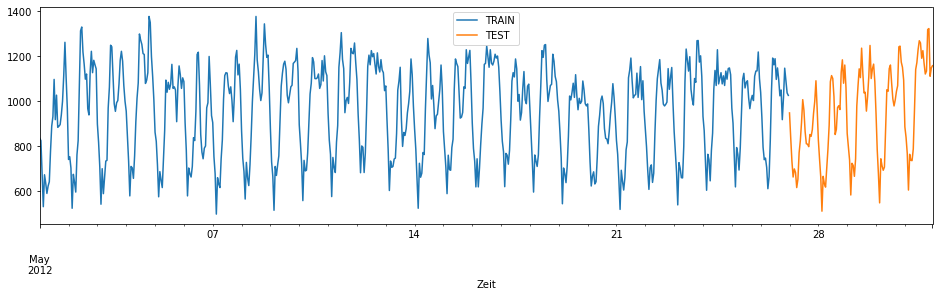

In [69]:
train_em = em[:624]
test_em = em[624:]
train_em['Strom'].plot(legend=True,label='TRAIN')
test_em['Strom'].plot(legend=True,label='TEST',figsize=(16,4));

In [73]:
scaler = MinMaxScaler()

In [75]:
scaler.fit(train_em)
scaled_train = scaler.transform(train_em)
scaled_test = scaler.transform(test_em)

In [134]:
n_input = 168
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [135]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [136]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100)               40800     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [137]:
model.fit(generator,epochs=20)

Epoch 1/20
456/456 [==============================] - 20s 41ms/step - loss: 0.0445
Epoch 2/20
456/456 [==============================] - 18s 40ms/step - loss: 0.0242
Epoch 3/20
456/456 [==============================] - 18s 39ms/step - loss: 0.0147
Epoch 4/20
456/456 [==============================] - 18s 40ms/step - loss: 0.0113
Epoch 5/20
456/456 [==============================] - 18s 39ms/step - loss: 0.0094
Epoch 6/20
456/456 [==============================] - 18s 39ms/step - loss: 0.0092
Epoch 7/20
456/456 [==============================] - 18s 40ms/step - loss: 0.0083
Epoch 8/20
456/456 [==============================] - 19s 41ms/step - loss: 0.0098
Epoch 9/20
456/456 [==============================] - 19s 41ms/step - loss: 0.0090
Epoch 10/20
456/456 [==============================] - 20s 43ms/step - loss: 0.0078
Epoch 11/20
456/456 [==============================] - 19s 42ms/step - loss: 0.0070
Epoch 12/20
456/456 [==============================] - 19s 41ms/step - loss: 0.0075
E

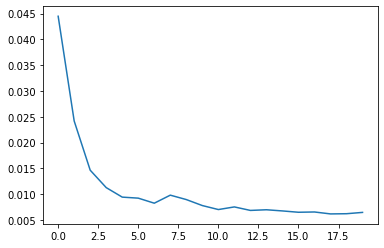

In [138]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [139]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, 1))

for i in range(len(test_em)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 38ms/step


In [140]:
true_predictions = scaler.inverse_transform(test_predictions)

In [141]:
test_em['Predictions'] = true_predictions

C:\Users\sinaa\AppData\Local\Temp\ipykernel_26792\3586378128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_em['Predictions'] = true_predictions


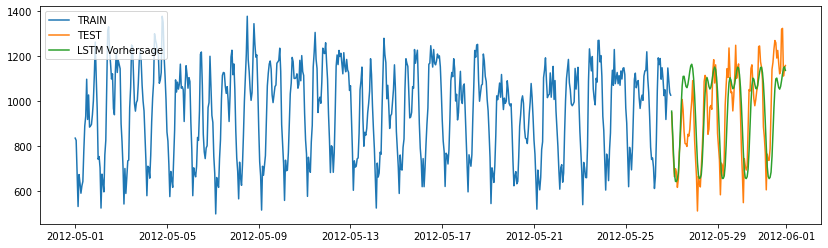

In [142]:
fig = plt.figure(figsize = (14,4))
ax = fig.add_subplot(111)

ax.plot(train_em.index,train_em['Strom'], label = "TRAIN")
ax.plot(test_em.index,test_em['Strom'], label = "TEST")
ax.plot(test_em.index,test_em['Predictions'], label = "LSTM Vorhersage")
plt.legend(loc='upper left');
plt.show()

In [143]:
errors = [['Mean Absolute Error', mean_absolute_error(test_em['Strom'],test_em['Predictions'])], ['Mean Squared Error', mean_squared_error(test_em['Strom'],test_em['Predictions'])]] 
errors = pd.DataFrame(errors, columns = ['Art des Fehlers','LSTM Vorhersage']) 
errors.set_index('Art des Fehlers', inplace=True) 
errors = round(errors, 2)
errors 

,LSTM Vorhersage
Art des Fehlers,
Mean Absolute Error,111.74
Mean Squared Error,20136.78


Vergleich mit anderen Modellen

In [126]:
from prophet import Prophet
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [127]:
model_hw = ExponentialSmoothing(train_em['Strom'], seasonal='add', seasonal_periods=24)
model_hw_fit = model_hw.fit()
forecast_hw = model_hw_fit.forecast(len(test_em))

In [128]:
model_sarima = SARIMAX(train_em['Strom'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
model_sarima_fit = model_sarima.fit(disp=False)
forecast_sarima = model_sarima_fit.get_forecast(steps=len(test_em)).predicted_mean

In [129]:
df_prophet = train_em.reset_index()
df_prophet.head()

,Zeit,Strom
0,2012-05-01 00:00:00,834.0
1,2012-05-01 01:00:00,824.0
2,2012-05-01 02:00:00,681.0
3,2012-05-01 03:00:00,530.0
4,2012-05-01 04:00:00,672.0


In [130]:
df_prophet = train_em.reset_index()
df_prophet = df_prophet.rename(columns={'Zeit': 'ds', 'Strom': 'y'})
model_prophet = Prophet()
model_prophet.fit(df_prophet)
future = model_prophet.make_future_dataframe(periods=len(test_em), freq='H')
forecast_prophet = model_prophet.predict(future)

02:27:14 - cmdstanpy - INFO - Chain [1] start processing
02:27:14 - cmdstanpy - INFO - Chain [1] done processing


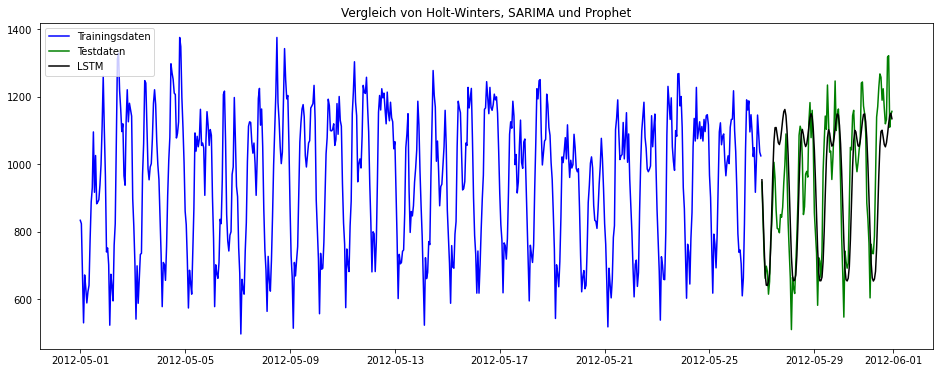

In [144]:
plt.figure(figsize=(16, 6))
plt.plot(train_em['Strom'], label='Trainingsdaten', color='blue')
plt.plot(test_em['Strom'], label='Testdaten', color='green')
#plt.plot(test_em.index, forecast_hw, label='Holt-Winters', color='orange')
#plt.plot(test_em.index, forecast_sarima, label='SARIMA', color='purple')
#plt.plot(test_em.index, forecast_prophet['yhat'].tail(len(test_em)), label='Prophet', color='red')
plt.plot(test_em.index, test_em['Predictions'], label="LSTM",color='black')
plt.legend(loc='upper left')
plt.title('Vergleich von Holt-Winters, SARIMA und Prophet')
plt.show()

In [145]:
y_true = test_em['Strom']
y_hw = forecast_hw
y_sarima = forecast_sarima
y_prophet = forecast_prophet['yhat'].tail(len(test_em))
y_lstm = test_em['Predictions']

mae_hw = mean_absolute_error(y_true, y_hw)
mse_hw = mean_squared_error(y_true, y_hw)

mae_sarima = mean_absolute_error(y_true, y_sarima)
mse_sarima = mean_squared_error(y_true, y_sarima)

mae_prophet = mean_absolute_error(y_true, y_prophet)
mse_prophet = mean_squared_error(y_true, y_prophet)

mae_lstm = mean_absolute_error(y_true, y_lstm)
mse_lstm = mean_squared_error(y_true, y_lstm)

errors = pd.DataFrame({
    'Art des Fehlers': ['Mean Absolute Error', 'Mean Squared Error'],
    'Holt-Winters Vorhersage': [mae_hw, mse_hw],
    'SARIMA Vorhersage': [mae_sarima, mse_sarima],
    'Prophet Vorhersage': [mae_prophet, mse_prophet],
    'LSTM Vorhersage': [mae_lstm, mse_lstm]
})

errors.set_index('Art des Fehlers', inplace=True)
errors = round(errors, 2)
errors

,Holt-Winters Vorhersage,SARIMA Vorhersage,Prophet Vorhersage,LSTM Vorhersage
Art des Fehlers,,,,
Mean Absolute Error,86.89,72.41,63.08,111.74
Mean Squared Error,11569.63,9183.88,6181.03,20136.78
